# Linear Regression

## Simple Linear Regression
Linear function: <br>
$\hat{y}_{i} = ax + b $ 

Sum of the squared error:  <br>
$ E = \sum \limits _ {i=1}^ {N} (y_{i} - \hat y_{i})^2 $ 

Finding minimum value of error:  <br>
 $ E = \sum \limits _ {i=1}^ {N} (y_{i} - (ax_{i} + b))^2 $  <br>
 $ \frac {\partial E}{ \partial a }= \sum \limits _ {i=1}^ {N} 2(y_{i} - (ax_{i} + b))(-x_{i}) $  <br>
 $ \frac {\partial E}{ \partial b }= \sum \limits _ {i=1}^ {N} 2(y_{i} - (ax_{i} + b))(-1) $

 Setting the above equations to zero: <br>
 $ a \sum \limits _ {i=1}^ {N} (x_{i})^2 + b \sum \limits _ {i=1}^ {N} x_{i} = \sum \limits _ {i=1}^ {N} x_{i} y_{i}$  <br>
 $ a \sum \limits _ {i=1}^ {N} x_{i} + bN = \sum \limits _ {i=1}^ {N}  y_{i}$ 

 Solving 2-equation, 2- unknown:<br>
 $ a = \frac {N \sum \limits _ {i=1}^ {N} x_{i} y_{i} - \sum \limits _ {i=1}^ {N} x_{i}\sum \limits _ {i=1}^ {N}  y_{i}}{N\sum \limits _ {i=1}^ {N} x_{i}^2 -(\sum \limits _ {i=1}^ {N} x_{i})^2} $ <br>
 $ b = \frac {\sum \limits _ {i=1}^ {N}  y_{i}\sum \limits _ {i=1}^ {N} x_{i}^2 - \sum \limits _ {i=1}^ {N} x_{i}\sum \limits _ {i=1}^ {N} x_{i} y_{i}}{N\sum \limits _ {i=1}^ {N} x_{i}^2 -(\sum \limits _ {i=1}^ {N} x_{i})^2} $

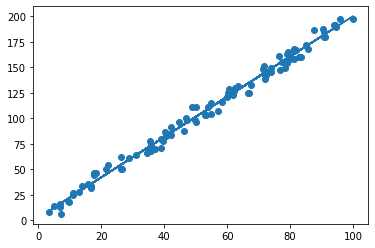

In [2]:
# Implementing simple Linear Regression

import numpy as np
import matplotlib.pyplot as plt

# load the data
X=[]
Y=[]
for line in open('Desktop/Machine Learning Roadmap/datasets/data_1d.csv'):
    # line.split is for turning string into list
    x,y = line.split(',')
    X.append(float(x))
    Y.append(float(y))

# turning X, Y into numpy array because is more useful
X = np.array(X)
Y =np.array(Y)

# visualizing data to see its pattern
plt.scatter(X,Y);
# as we can see it generates data, approximately, on a line

# Applying a linear line(y=ax+b) which has the best a and b parametes to fit data
# note: as we see in the calculations the denominator is the same
denom= X.dot(X) - X.mean()* X.sum()
a= (X.dot(Y)- Y.mean()*X.sum())/ denom
b= (Y.mean()* X.dot(X)- X.mean()*X.dot(Y))/ denom

# calculating predicted Y
pre_y = a*X + b
plt.plot(X, pre_y);


Calculating the r-squared (determining how good the model is): <br>
$ R^2 = 1- \frac {SS_{res}}{SS_{tot}}$ <br>
$ SS_{res} = \sum \limits_{i=1}{n} (y_{i} - \hat y_{i})^2 $ <br>
$ SS_{tot} = \sum \limits_{i=1}{n} (y_{i} - \bar y_{i})^2 $ <br>

In [3]:
# Calculate r-squared
d1= Y- pre_y
d2= Y- Y.mean()
r = 1- d1.dot(d1)/ d2.dot(d2)
print(r)
# the result is so close to 1 which means our model works well. 

0.9911838202977805


## Applying Linear Regression to Moore's Law
Concept: Transistors count on integrated circuits doubles every two years. <br>
$log(tc)= a*year + b $<br>
$tc = exp(b) * exp(a*year)$ <br>
$2 * tc = exp(ln(2)) * exp(b) * exp(a*year) = exp(b) * exp(a*year + ln(2))$ <br>
$ exp(b) * exp(a*year2) = exp(b) * exp(a*year1 + ln(2))$ <br>
$a*year2 = a*year1 + ln(2)$ <br>
$year2 = year1 + ln(2)/a $

a: 0.3510435733650199 b: -685.000284381709
The r-squared: 0.952944285228576
Time to double transistor: 1.9745331723797188 years


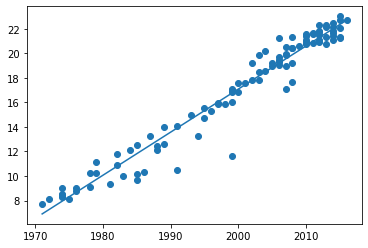

In [15]:
# Importing necessary libraries

import re
import numpy as np
import matplotlib.pyplot as plt

# data
X =[]
Y =[]

# Removing non-decimal elements from the data
non_decimal= re.compile(r'[^\d]+')

# Preparing data
for line in open('Desktop/Machine Learning Roadmap/datasets/moore.csv'):
    r = line.split('\t')
    
    x = int(non_decimal.sub('',r[2].split('[')[0]))
    y = int(non_decimal.sub('',r[1].split('[')[0]))
    X.append(x)
    Y.append(y)

# Convert to numpy array
X = np.array(X)
Y = np.array(Y)

# Ploting X- log(Y)
Y = np.log(Y)
plt.scatter(X,Y);

# Linear Model
denom= X.dot(X) - X.mean()* X.sum()
a= (X.dot(Y)- Y.mean()*X.sum())/ denom
b= (Y.mean()* X.dot(X)- X.mean()*X.dot(Y))/ denom

# Calculating predicted Y
pre_y = a*X + b
plt.plot(X, pre_y);

# Calculate r-squared
d1= Y- pre_y
d2= Y- Y.mean()
r = 1- d1.dot(d1)/ d2.dot(d2)
print('a:',a,'b:',b)
print('The r-squared:',r)
print('Time to double transistor:',np.log(2)/a, 'years')

## Multiple Linear Regression
Multiple linear function: <br>
$\hat{y}_{i} = w^Tx + b $  

Sum of the squared error:  <br>
$ E = \sum \limits _ {i=1}^ {N} (y_{i} - \hat y_{i})^2 $ 

Finding minimum value of error:  <br>
 $ E = \sum \limits _ {i=1}^ {N} (y_{i} - (w^Tx_{i}))^2 $  <br>
 $ \frac {\partial E}{ \partial w }= \sum \limits _ {i=1}^ {N} 2(y_{i} - (w^Tx_{i}))(-x_{ij})=0 ,  i : Sample, j: Feature $  <br>
 $\sum \limits _ {i=1}^ {N} w^Tx_{i}x_{ij}=\sum \limits _ {i=1}^ {N} w^Ty_{i}x_{ij}$ <br>
 <br>
 $w^T(X^TX)=y^TX$ <br>
 $w=(X^TX)^-1X^Ty$ <br>

r-squared: 0.9980040612475778


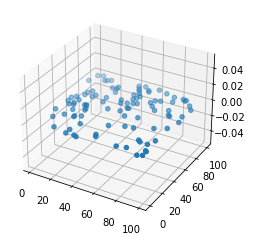

In [3]:
# Multiple Linear Regression

# In the data_2d.csv file, the first and second columns are x1 and x2 and the third one is y, respectively
# Import necessary libraries

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Loading the data
X=[]
Y=[]
for line in open('Desktop/Machine Learning Roadmap/datasets/data_2d.csv'):
    x1 , x2, y = line.split(',')
    X.append([float(x1),float(x2),1])
    Y.append(float(y))

# Convert them to numpy arrays
X = np.array(X)
Y = np.array(Y)

# Ploting our data
flg = plt.figure()
ax = flg.add_subplot(111,projection = '3d')
ax.scatter(X[:,0],X[:,1]);

# Calculate weights
w = np.linalg.solve(np.dot(X.T,X),np.dot(X.T,Y))
Yhat=np.dot(X,w)

# r-squared
d1 = Y- Yhat
d2= Y- Y.mean()
r = 1- d1.dot(d1)/d2.dot(d2)
print('r-squared:',r)


r-squared: 0.9991412296366858


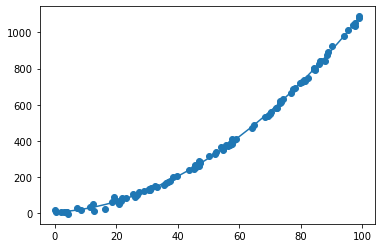

In [8]:
# Polynomial Regression
# It doesnt matter if we have curves, still we can use linear regression calculations

import numpy as np
import matplotlib.pyplot as plt

# load the data
X=[]
Y=[]
for line in open('Desktop/Machine Learning Roadmap/datasets/data_poly.csv'):
    x, y = line.split(',')
    x= float(x)
    X.append([1, x, x*x])
    Y.append(float(y))
    
# Converting to numpy array
X = np.array(X)
Y = np.array(Y)

# Ploting the data
plt.scatter(X[:,1],Y)
    
# Calculate weights
w = np.linalg.solve(np.dot(X.T,X),np.dot(X.T,Y))
Yhat=np.dot(X,w)
plt.plot(sorted(X[:,1]),sorted(Yhat));
    
# r- squared
d1 = Y- Yhat
d2= Y- Y.mean()
r = 1- d1.dot(d1)/d2.dot(d2)
print('r-squared:',r)

## Predicting Systolic Blood Pressure From Age and Weight


*** No CODEPAGE record, no encoding_override: will use 'ascii'
r2 for x2 only: 0.9578407208147355
r2 for x3 only: 0.9419952085293065
r2 for both: 0.9768471041502091


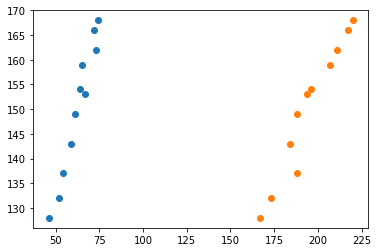

In [15]:
# https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/frames/mlr02.html
# The data (X1, X2, X3) are for each patient.
# X1 = systolic blood pressure
# X2 = age in years
# X3 = weight in pounds

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel('Desktop/Machine Learning Roadmap/datasets/mlr02.xls')
X= np.array(df)
plt.scatter(X[:,1],X[:,0])
plt.scatter(X[:,2],X[:,0])

# Defining bias
df['ones']=1
Y= df['X1']
X= df[['X2','X3','ones']]
X2only= df[['X2','ones']]
X3only= df[['X3','ones']]

# Calculate weights
def get_r2(X,Y):
    w = np.linalg.solve(np.dot(X.T,X),np.dot(X.T,Y))
    Yhat=np.dot(X,w)
    
    d1 = Y- Yhat
    d2= Y- Y.mean()
    r = 1- d1.dot(d1)/d2.dot(d2)
    return r

print('r2 for x2 only:',get_r2(X2only,Y))
print('r2 for x3 only:',get_r2(X3only,Y))
print('r2 for both:',get_r2(X,Y))